Code by Praveensaik [link](https://www.kaggle.com/code/praveensaik/chronic-kidney-disease-prediction)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./data/kidney_disease.csv")

# Exploring Dataset

In [3]:
print("The dataset shape is {}".format(df.shape))

The dataset shape is (400, 26)


In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [6]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [7]:
# Getting information from data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [8]:
# Describe only numeric values

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [9]:
# Find unique values of each feature

for col in df:
    unique = df[col].value_counts().to_dict()
    print(col, ':', unique, "\n======\n")

id : {0: 1, 263: 1, 273: 1, 272: 1, 271: 1, 270: 1, 269: 1, 268: 1, 267: 1, 266: 1, 265: 1, 264: 1, 262: 1, 1: 1, 261: 1, 260: 1, 259: 1, 258: 1, 257: 1, 256: 1, 255: 1, 254: 1, 253: 1, 252: 1, 274: 1, 275: 1, 276: 1, 277: 1, 298: 1, 297: 1, 296: 1, 295: 1, 294: 1, 293: 1, 292: 1, 291: 1, 290: 1, 289: 1, 288: 1, 287: 1, 286: 1, 285: 1, 284: 1, 283: 1, 282: 1, 281: 1, 280: 1, 279: 1, 278: 1, 251: 1, 250: 1, 249: 1, 224: 1, 222: 1, 221: 1, 220: 1, 219: 1, 218: 1, 217: 1, 216: 1, 215: 1, 214: 1, 213: 1, 212: 1, 211: 1, 210: 1, 209: 1, 208: 1, 207: 1, 206: 1, 205: 1, 204: 1, 203: 1, 202: 1, 223: 1, 225: 1, 248: 1, 226: 1, 247: 1, 246: 1, 245: 1, 244: 1, 243: 1, 242: 1, 241: 1, 240: 1, 239: 1, 238: 1, 237: 1, 236: 1, 235: 1, 234: 1, 233: 1, 232: 1, 231: 1, 230: 1, 229: 1, 228: 1, 227: 1, 299: 1, 300: 1, 301: 1, 375: 1, 373: 1, 372: 1, 371: 1, 370: 1, 369: 1, 368: 1, 367: 1, 366: 1, 365: 1, 364: 1, 363: 1, 362: 1, 361: 1, 360: 1, 359: 1, 358: 1, 357: 1, 356: 1, 355: 1, 354: 1, 353: 1, 374: 1

# Identifying Activities

Some tasks:
1) Remove unwanted columns
2) Cleaning data
3) Handling Missing/Nan values
4) Exploratory Data Analysis
5) Handle Categorical Data
6) Handle Numeric Data

# EDA & Visualization

**Remove unwanted columns**

We need to remove feature that are not useful such as ID, which in every instance it has unique value, and should be dropped.

In [10]:
# Remove unwanted columns
# Remove 'id' feature

df.drop('id', axis=1, inplace=True)

**Cleaning the Data values**

In [11]:
# Degine categorical features

cat_cols = list(df.select_dtypes('object'))
cat_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [12]:
# Let's if there are inconsistencies in the categorical columns

for col in cat_cols:
    unique = df[col].value_counts().to_dict()
    print(col, ':', unique, "\n======\n")

rbc : {'normal': 201, 'abnormal': 47} 

pc : {'normal': 259, 'abnormal': 76} 

pcc : {'notpresent': 354, 'present': 42} 

ba : {'notpresent': 374, 'present': 22} 

pcv : {'41': 21, '52': 21, '44': 19, '48': 19, '40': 16, '43': 14, '42': 13, '45': 13, '32': 12, '36': 12, '33': 12, '50': 12, '28': 12, '34': 11, '37': 11, '30': 9, '29': 9, '35': 9, '46': 9, '31': 8, '24': 7, '39': 7, '26': 6, '38': 5, '53': 4, '51': 4, '49': 4, '47': 4, '54': 4, '25': 3, '27': 3, '22': 3, '19': 2, '23': 2, '15': 1, '21': 1, '17': 1, '20': 1, '\t43': 1, '18': 1, '9': 1, '14': 1, '\t?': 1, '16': 1} 

wc : {'9800': 11, '6700': 10, '9200': 9, '9600': 9, '7200': 9, '5800': 8, '6900': 8, '11000': 8, '7800': 7, '9400': 7, '9100': 7, '7000': 7, '10700': 6, '10500': 6, '6300': 6, '4300': 6, '9500': 5, '8600': 5, '5600': 5, '5000': 5, '7500': 5, '8100': 5, '10200': 5, '7900': 5, '8300': 5, '6000': 4, '6800': 4, '10400': 4, '6200': 4, '6500': 4, '7700': 4, '4700': 4, '5500': 4, '10300': 4, '7300': 3, '4200': 3, '840

In [13]:
# Some categorical features ['pcv', 'wc', 'rc'] must be numerical

# cleaning 'PCV', 'WC', 'RC'
df['pcv'] =  df['pcv'].apply(lambda x: x if type(x) == type(3.5) else x.replace('\t43', '43').replace('\t?', 'Nan'))
df['wc'] = df['wc'].apply(lambda x: x if type(x) == type(3.5) else x.replace('\t?', 'Nan').replace('\t6200', '6200').replace('\t8400', '8400'))
df['rc'] = df['rc'].apply(lambda x: x if type(x) == type(3.5) else x.replace('\t?', 'Nan'))

# So now, features are mistyped as 'object', so convert them into 'float' type
df['pcv'] = df['pcv'].astype('float')
df['rc'] = df['rc'].astype('float')
df['wc'] = df['wc'].astype('float')

In [14]:
# Now, there are trush values in categorical

# Cleaning 'dm', 'cad', 'classification'
df['dm'] = df['dm'].apply(lambda x: x if type(x) == type(3.5) else x.replace('\tno', 'no').replace('\tyes', 'yes').replace(' yes', 'yes'))
df['cad'] = df['cad'].apply(lambda x: x if type(x) == type(3.5) else x.replace('\tno', 'no'))
df['classification'] = df['classification'].apply(lambda x: x if type(x) == type(3.5) else x.replace('ckd\t', 'ckd'))

In [15]:
# Degine numerical features
num_cols = list(df.select_dtypes(['int64', 'float64']))
num_cols

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

**Handling Nan values**

In [16]:
# Checking missing/Nan values
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

We hace found that there are Nan values in every feature, except in Target feature

In [17]:
# Let's see if there are numerical features with Nan values

df[num_cols].isnull().sum().sort_values(ascending=False)

rc      131
wc      106
pot      88
sod      87
pcv      71
hemo     52
su       49
sg       47
al       46
bgr      44
bu       19
sc       17
bp       12
age       9
dtype: int64

In [18]:
# Let's impute Nan Values with median in numeric features

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [19]:
# Let's see the most common feature from each categorical feature

df[cat_cols].isnull().sum().sort_values(ascending=False)

rbc               152
pc                 65
pcc                 4
ba                  4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
pcv                 0
wc                  0
rc                  0
classification      0
dtype: int64

In [20]:
# Let's see the most frequent value per each categorical column

for col in cat_cols:
    unique = df[col].value_counts().to_dict()
    print(col, ':', unique, "\n======\n")

rbc : {'normal': 201, 'abnormal': 47} 

pc : {'normal': 259, 'abnormal': 76} 

pcc : {'notpresent': 354, 'present': 42} 

ba : {'notpresent': 374, 'present': 22} 

pcv : {40.0: 87, 52.0: 21, 41.0: 21, 44.0: 19, 48.0: 19, 43.0: 15, 45.0: 13, 42.0: 13, 32.0: 12, 36.0: 12, 33.0: 12, 50.0: 12, 28.0: 12, 37.0: 11, 34.0: 11, 46.0: 9, 30.0: 9, 29.0: 9, 35.0: 9, 31.0: 8, 24.0: 7, 39.0: 7, 26.0: 6, 38.0: 5, 53.0: 4, 51.0: 4, 49.0: 4, 47.0: 4, 54.0: 4, 25.0: 3, 27.0: 3, 22.0: 3, 19.0: 2, 23.0: 2, 15.0: 1, 21.0: 1, 20.0: 1, 17.0: 1, 9.0: 1, 18.0: 1, 14.0: 1, 16.0: 1} 

wc : {8000.0: 109, 9800.0: 11, 6700.0: 10, 9200.0: 9, 7200.0: 9, 9600.0: 9, 5800.0: 8, 6900.0: 8, 11000.0: 8, 7800.0: 7, 7000.0: 7, 9100.0: 7, 9400.0: 7, 6300.0: 6, 4300.0: 6, 10700.0: 6, 10500.0: 6, 10200.0: 5, 8600.0: 5, 7500.0: 5, 9500.0: 5, 5600.0: 5, 8100.0: 5, 7900.0: 5, 8300.0: 5, 5000.0: 5, 6200.0: 5, 6000.0: 4, 6500.0: 4, 4700.0: 4, 6800.0: 4, 5500.0: 4, 10400.0: 4, 7700.0: 4, 8400.0: 4, 10300.0: 4, 7300.0: 3, 6400.0: 3, 5

In [21]:
# Let's impute categorical features with most frequent values

df['rbc'].fillna('normal', inplace=True)
df['pc'].fillna('normal', inplace=True)
df['pcc'].fillna('notpresent', inplace=True)
df['ba'].fillna('notpresent', inplace=True)
df['htn'].fillna('no', inplace=True)
df['dm'].fillna('no', inplace=True)
df['cad'].fillna('no', inplace=True)
df['appet'].fillna('good', inplace=True)
df['pe'].fillna('no', inplace=True)
df['ane'].fillna('no', inplace=True)


**Target Feature Exploration**

In [22]:
# Encode classification

df['classification'] = df['classification'].map({'ckd':1, 'notckd':0})

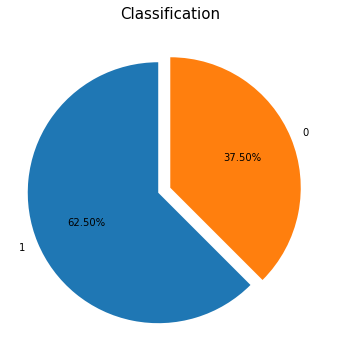

In [23]:
attr_count = df['classification'].value_counts()
attr_label = df['classification'].value_counts().index

# plot
fig, ax = plt.subplots(figsize=(14, 6))
ax.pie(attr_count, explode=(0.1, 0), labels=attr_label, autopct='%.2f%%', startangle=90)
ax.set_title('Classification', fontsize=15)
plt.show()

**Distribution**

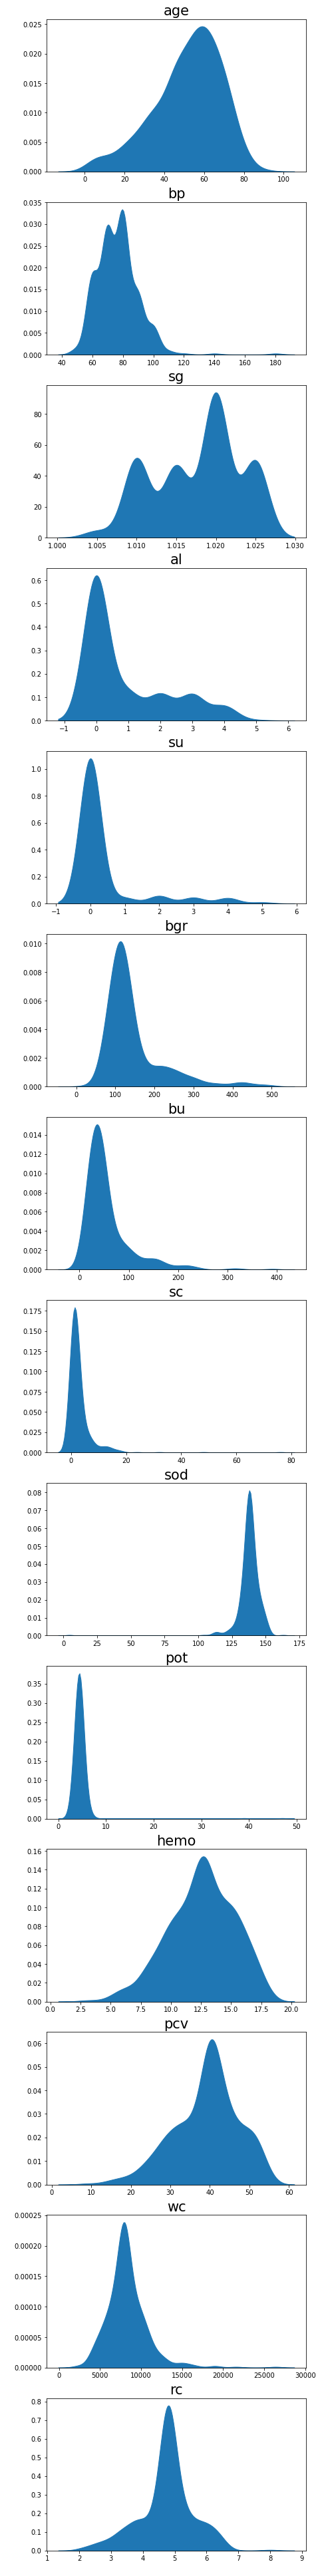

In [24]:
fig, ax = plt.subplots(figsize=(7, 70), ncols=1, nrows=14)

i = 0
for col in num_cols:
    sns.kdeplot(x=df[col], fill=True, alpha=1, ax=ax[i])
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].set_title(label=col, fontsize=21)
    i = i+1
plt.show()

In [25]:
# Check skewness of the distribution

skew = []
for col in num_cols:
    skew.append(round(df[col].skew(), 3))

num_dist = pd.DataFrame({'features': num_cols, 'skewness':skew})
num_dist

,features,skewness
0,age,-0.689
1,bp,1.602
2,sg,-0.333
3,al,1.180
4,su,2.700
5,bgr,2.204
6,bu,2.724
7,sc,7.666
8,sod,-7.929
9,pot,13.133


Features that have skewness between -0.05 and 0.005 are assumed to be **Gaussian Normal Distribution**, but we do not find any feature which has normal distribution. 

**Numerical relation ship** 

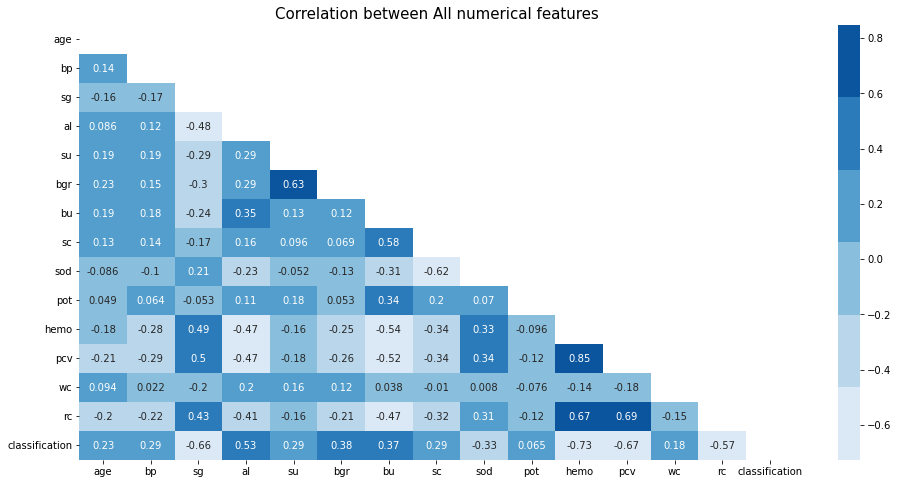

In [26]:
plt.figure(figsize=(16, 8))

# Create a mask
mask = np.triu(np.ones_like(df.corr()))


# Create a colormap
colormap = sns.color_palette('Blues')

# Plot heatmap
sns.heatmap(df.corr(), annot=True, cmap=colormap, mask=mask)

plt.title('Correlation between All numerical features', size=15)
plt.show()

Here we can see that some features are highly correlated, such as hemo and pcv (0.85).

We only need one of them and we can safely drop the other, we choose to drop one feature that have higher correlation to target variable that is pcv (-.67 vs -0.73)

In [27]:
df.drop('pcv', axis=1, inplace=True)
num_cols.remove('pcv')

**Target relationship**

In [28]:
tg_num_corr = []

for col in num_cols:
    tg_num_corr.append(df[col].corr(df['classification']))
    
# Create as Dataframe
tg_num_df = pd.DataFrame({'numerical_predictor': num_cols, 'correlation_w_target':tg_num_corr})

# Sort the dataframe by the absolute value of their correlation coefficient descending
tg_num_df = tg_num_df.sort_values(by='correlation_w_target', ascending=False).reset_index(drop=True)

tg_num_df

,numerical_predictor,correlation_w_target
0,al,0.531562
1,bgr,0.379321
2,bu,0.369393
3,su,0.294555
4,bp,0.293693
5,sc,0.291245
6,age,0.227842
7,wc,0.177571
8,pot,0.065218
9,sod,-0.334900


<AxesSubplot:xlabel='correlation_w_target', ylabel='numerical_predictor'>

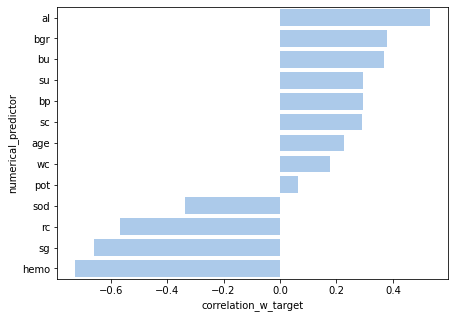

In [29]:
# display the figure

plt.figure(figsize=(7, 5))
sns.barplot(x=tg_num_df['correlation_w_target'], y=tg_num_df['numerical_predictor'], color='#a2c9f4')

**Outlier detection**

In [30]:
num_cols

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'wc',
 'rc']

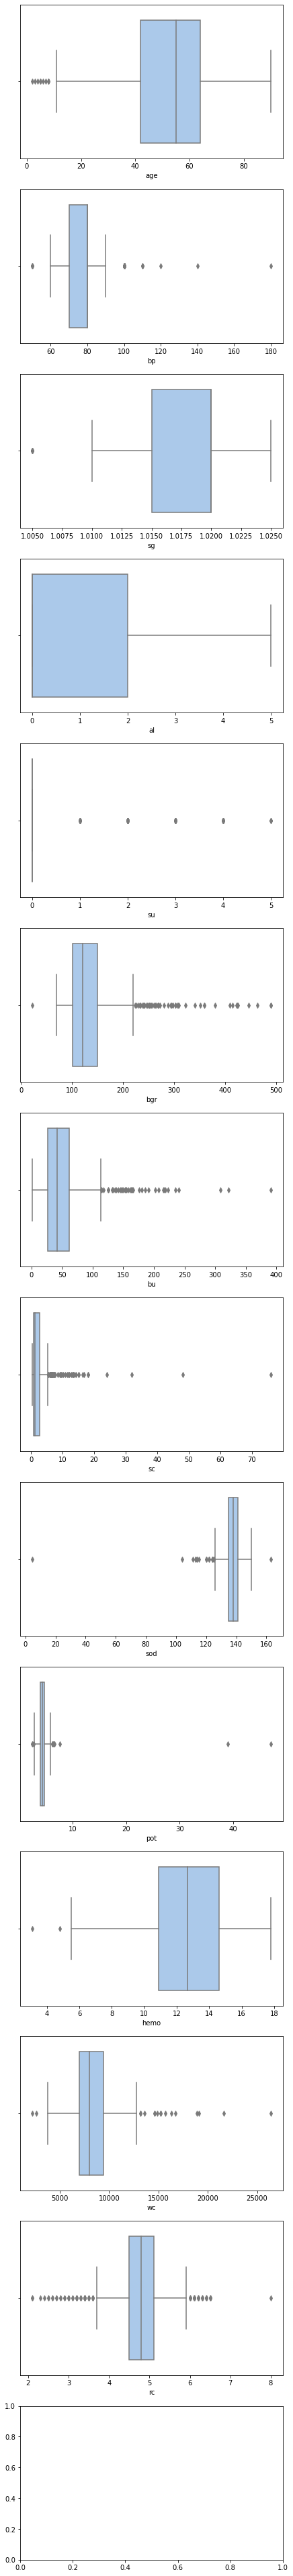

In [31]:
# set the figure
fig, ax = plt.subplots(ncols=1, nrows=14, figsize=(7, 70))
i = 0
for col in num_cols:
    sns.boxplot(data=df, x=col, ax=ax[i], palette='pastel')
    # ax[i].set_title(col, fontsize=14)
    i = i+1

plt.show()

Here, we are not removing outliers because we have small dataset.

**Enconding**

In [32]:
# Encoding variables
df['rbc'] = df['rbc'].map({'normal':0, 'abnormal':1})
df['pc'] = df['pc'].map({'normal':0, 'abnormal':1})
df['pcc'] = df['pcc'].map({'notpresent':0, 'present':1})
df['ba'] = df['ba'].map({'notpresent':0, 'present':1})
df['htn'] = df['htn'].map({'no':0, 'yes':1})
df['dm'] = df['dm'].map({'no':0, 'yes':1})
df['cad'] = df['cad'].map({'no':0, 'yes':1})
df['pe'] = df['pe'].map({'no':0, 'yes':1})
df['ane'] = df['ane'].map({'no':0, 'yes':1})
df['appet'] = df['appet'].map({'good':0, 'poor':1})

In [33]:
# Scaling with MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm_scaler = MinMaxScaler()
df[num_cols] = mm_scaler.fit_transform(df[num_cols])

# Model Building

In [34]:
from sklearn.model_selection import train_test_split
x = df.drop('classification', axis=1)
y = df['classification']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("X_train size {}, X_test size {}".format(X_train.shape, X_test.shape))

X_train size (320, 23), X_test size (80, 23)


In [35]:
# Using GridSearchCV we find best algoritm to this problem
from sklearn.model_selection import ShuffleSplit, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [36]:
# Create a function to find the best algoritm for this problem

def find_best_model(x, y):
    models = {
    'Logistic_regression': {'model': LogisticRegression(solver='liblinear', penalty='l2', multi_class='auto'), 'parameter': {'C': [1,4,8]}},
    'decision_tree': {'model': DecisionTreeClassifier(splitter='best'), 'parameter': {'criterion':['gini', 'entropy'], 'max_depth':[5,7,13,15]}},
    'svm': {'model': SVC(gamma='auto'), 'parameter': {'kernel': ['sigmoid', 'linear'], 'C':[1,5,10,15]}},
    'random_forest': {'model': RandomForestClassifier(criterion='gini'), 'parameter':{'max_depth':[5, 10, 15], 'n_estimators':[1,3,5]}},
    }
    scores=[]
    cv_shuffle = StratifiedKFold(n_splits=10)

    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameter'], cv=cv_shuffle, return_train_score=False)
        gs.fit(x,y)
        scores.append({'model': model_name, 'best_parameters': gs.best_params_, 'score': gs.best_score_})
    
    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,Logistic_regression,{'C': 4},0.975000
1,decision_tree,"{'criterion': 'entropy', 'max_depth': 5}",0.975000
2,svm,"{'C': 5, 'kernel': 'linear'}",0.978125
3,random_forest,"{'max_depth': 10, 'n_estimators': 3}",0.990625


**Note:** Since the RandomForest Classifier has the highest accuracy, we further fine tune the model using hyperparameter optimization.

In [37]:
# Using cross_val_score for gaining average accuracy

from sklearn.model_selection import cross_val_score
score = cross_val_score(RandomForestClassifier(max_depth=15, n_estimators=5), X_train, y_train, cv=10)
print('Average Accuracy Score {}'.format(score))

Average Accuracy Score [1.      1.      0.96875 1.      1.      0.96875 0.96875 1.      1.
 1.     ]


In [38]:
# Creating Random Forest model
rf = RandomForestClassifier(max_depth=5, n_estimators=5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=5)

# Model Evaluation

In [39]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
cm

array([[28,  0],
       [ 0, 52]], dtype=int64)

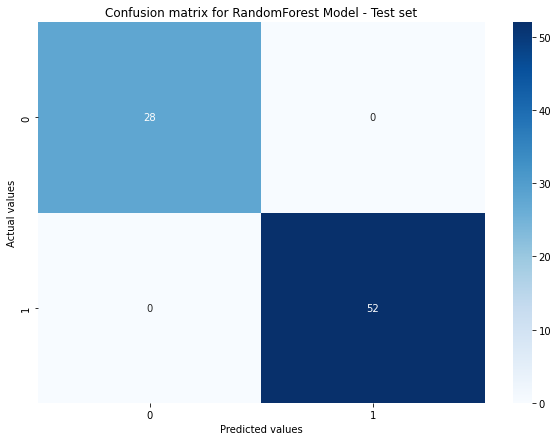

In [40]:
# Plotting the confusion matric
plt.figure(figsize=(10,7))

p = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion matrix for RandomForest Model - Test set')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [41]:
# Accuracy score
score = round(accuracy_score(y_test, y_pred), 3)
print('Accuracy on the test set: {}'.format(score))

Accuracy on the test set: 1.0


In [42]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [43]:
# Creating a confusion matrix for training set
y_train_pred = rf.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[121,   1],
       [  0, 198]], dtype=int64)

In [44]:
# Accuracy score
score = round(accuracy_score(y_train, y_train_pred), 3)
print('Accuracy on training set: {}'.format(score))

Accuracy on training set: 0.997


In [45]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       122
           1       0.99      1.00      1.00       198

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



**Feature Selection**

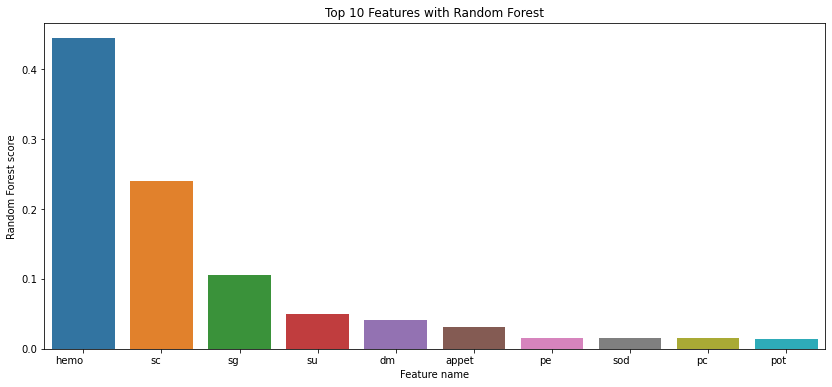

In [46]:
# Top 10 features
feature_scores = pd.DataFrame(rf.feature_importances_, columns=['Score'], index=X_train.columns).sort_values(by='Score', ascending=False)
top10_feature = feature_scores.nlargest(n=10, columns=['Score'])

plt.figure(figsize=(14,6))
g = sns.barplot(x=top10_feature.index, y=top10_feature['Score'])
p = plt.title('Top 10 Features with Random Forest')
p = plt.xlabel('Feature name')
p = plt.ylabel('Random Forest score')
p = g.set_xticklabels(g.get_xticklabels(), horizontalalignment='right')

# Prediction

In [47]:
X_train = X_train[['hemo', 'rc', 'sg', 'al', 'sc', 'htn', 'sod', 'bp', 'wc', 'age']]
X_test = X_test[['hemo', 'rc', 'sg', 'al', 'sc', 'htn', 'sod', 'bp', 'wc', 'age']]
rf.fit(X_train, y_train)

def predict(hemo, rc, sg, al, sc, htn, sod, bp, wc, age):
    hemo = float(hemo)
    rc = float(rc)
    sg = float(sg)
    sc = float(sc)
    htn = int(htn)
    sod = float(sod)
    bp = float(bp)
    wc = float(wc)
    age = int(age)

    x = [[hemo, rc, sg, al, sc, htn, sod, bp, wc, age]]
    return rf.predict(x)

In [48]:
# Prediction 1
# input parameter: Hemoglobin(hemo), Red Blood Cells(rc), Specific Gravity(sg), Albumin(al), Searum Creatinite(sc)
# Hypertension(htn), Sodium(sod), Blood Pressure(bp), White blood cells(wc), Age
prediction = predict(67.4, 7.2, 0.99, 4, 17.0, 1, 160.6, 87, 22089, 36)[0]
if prediction:
    print('Oops!, You have Chronic Kidney Disease')
else:
    print('Great')

Oops!, You have Chronic Kidney Disease


In [49]:
# Prediction 2
# input parameter: Hemoglobin(hemo), Red Blood Cells(rc), Specific Gravity(sg), Albumin(al), Searum Creatinite(sc)
# Hypertension(htn), Sodium(sod), Blood Pressure(bp), White blood cells(wc), Age
prediction = predict(27.4, 4.2, 0.19, 1, 7.0, 0, 90.6, 37, 30949, 26)[0]
if prediction:
    print('Oops!, You have Chronic Kidney Disease')
else:
    print('Great')

Oops!, You have Chronic Kidney Disease


In [50]:
# Prediction 3
# input parameter : Hemoglobin(hemo), Red Blood Cells(rc), Specific Gravity(sg), Albumin(al), Searum Creatinite(sc), 
# Hypertension(htn), Sodium(sod), Blood Pressure(bp), White Blood Cells(wc), Age
prediction = predict(17.4, 2.2 , 0.89, 0, 12.0, 0, 50.6, 87, 949, 19)[0]
if prediction:
  print('Oops! You have Chronic Kidney Disease.')
else:
  print("Great! You don't have Chronic Kidney Disease.")

Great! You don't have Chronic Kidney Disease.
